In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

loan =pd.read_csv("loan.csv")

display(loan.head())
display(loan.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


None

Credit_History -> 0 means defaulted, 1 means not defaulted in the past

Loan_Status is our target variable

### Data Exploration & Preprocessing

In [2]:
loan = loan.drop("Loan_ID",axis=1)

## Standard scaling of the continuous columns only

for i in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]:
    loan[i] = (loan[i] - loan[i].mean())/loan[i].std()

### Outlier Detection using z-score

OutlierRows = loan[(loan["LoanAmount"]>3) |(loan["LoanAmount"]<-3) |
                   (loan["ApplicantIncome"]>3)|(loan["ApplicantIncome"]<-3)|
                   (loan["CoapplicantIncome"]>3)|(loan["CoapplicantIncome"]<-3)]

print("% of Outlier rows in the dataset is " + str(len(OutlierRows)/len(loan)*100)+"\n")
loan_OutlierFree = loan.drop(OutlierRows.index,axis=0)

### Missing Value Detection & treatment

MV = loan_OutlierFree.isna().sum()
print("% of Missing values by columns are")
print(MV[MV>0]/len(loan_OutlierFree)*100)

for i in MV[MV>0].index:
    
    if (i == "LoanAmount"):
        loan_OutlierFree[i].fillna(loan_OutlierFree[i].median(),inplace=True)
    else:
        loan_OutlierFree[i].fillna(loan_OutlierFree[i].mode()[0],inplace=True)

loan_noOutlierNoMV = loan_OutlierFree

% of Outlier rows in the dataset is 3.908794788273615

% of Missing values by columns are
Gender            1.864407
Married           0.508475
Dependents        2.542373
Self_Employed     4.915254
LoanAmount        3.728814
Credit_History    7.966102
dtype: float64


In [13]:
loan_noOutlierNoMV.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072931,-0.554036,-0.250179,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,-0.134302,-0.038700,-0.215127,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.393427,-0.554036,-0.939534,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.461686,0.251774,-0.308599,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.097649,-0.554036,-0.063236,1.0,Urban,Y


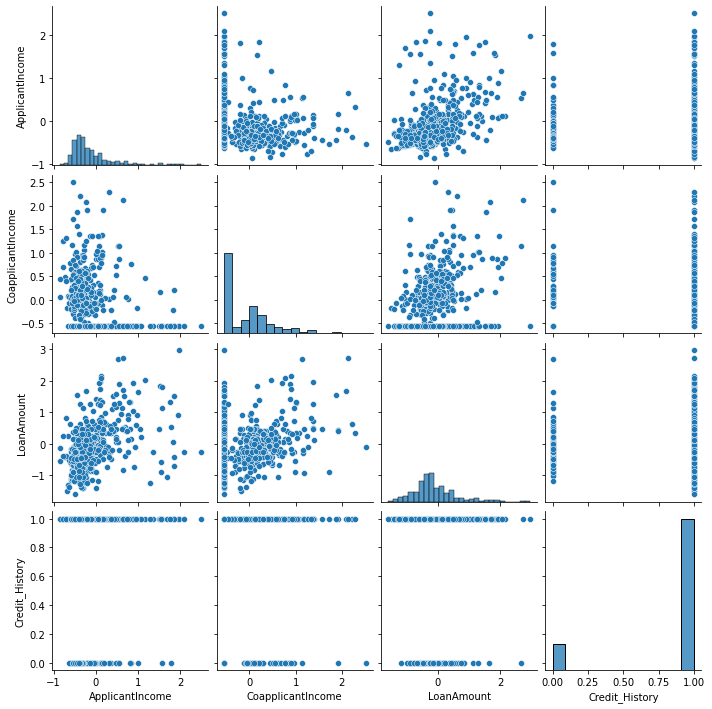

In [3]:
sns.pairplot(loan_noOutlierNoMV)

In [4]:
for i in loan_noOutlierNoMV.columns:
    if(i not in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]):
        display(loan_noOutlierNoMV[i].value_counts(normalize = True).reset_index())

,index,Gender
0,Male,0.815254
1,Female,0.184746


,index,Married
0,Yes,0.650847
1,No,0.349153


,index,Dependents
0,0,0.593220
1,2,0.167797
2,1,0.162712
3,3+,0.076271


,index,Education
0,Graduate,0.772881
1,Not Graduate,0.227119


,index,Self_Employed
0,No,0.869492
1,Yes,0.130508


,index,Credit_History
0,1.0,0.854237
1,0.0,0.145763


,index,Property_Area
0,Semiurban,0.376271
1,Urban,0.328814
2,Rural,0.294915


,index,Loan_Status
0,Y,0.691525
1,N,0.308475


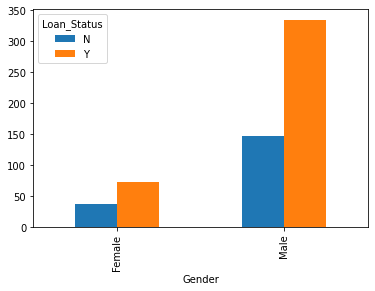

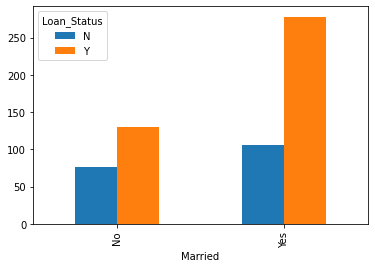

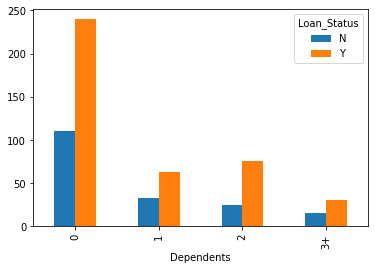

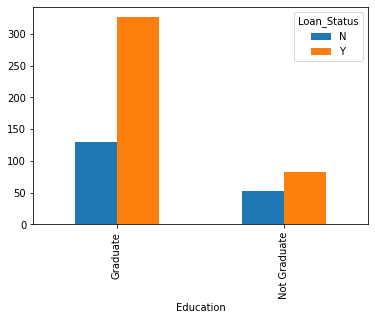

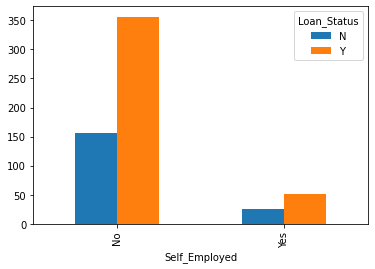

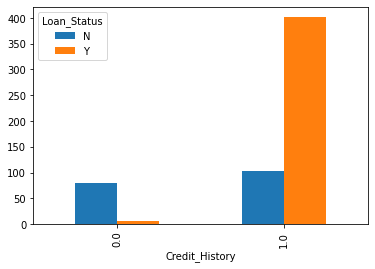

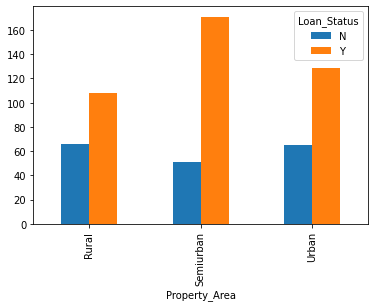

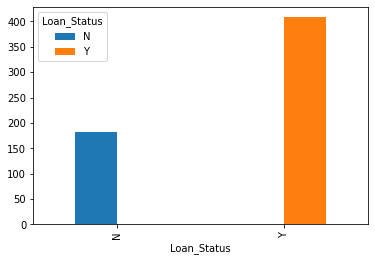

In [6]:
for i in loan_noOutlierNoMV.columns:
    if(i not in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]):
        tab = pd.crosstab(loan_noOutlierNoMV[i],loan_noOutlierNoMV["Loan_Status"])
#         display(tab)
        tab.plot(kind="bar")

<AxesSubplot:>

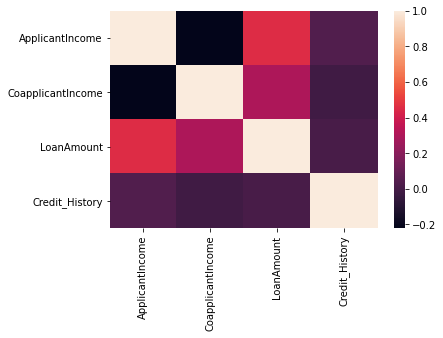

In [7]:
sns.heatmap(loan_noOutlierNoMV.corr())

No mulitcollinearity is observed

In [9]:
loan_noOutlierNoMV["Loan_Status"].replace(['Y','N'],[1,0],inplace = True)
loan_noOutlierNoMV["Gender"].replace(['Male','Female'],[1,0],inplace = True)
loan_noOutlierNoMV["Married"].replace(['Yes','No'],[1,0],inplace = True)
loan_noOutlierNoMV["Education"].replace(['Graduate','Not Graduate'],[1,0],inplace = True)
loan_noOutlierNoMV["Self_Employed"].replace(['Yes','No'],[1,0],inplace = True)

# Label enocoding not performed for Property_Area, Dependents because they have more than 2 classes
loan_new = pd.get_dummies(loan_noOutlierNoMV)

display(loan_new.head())
display(loan_new.info())

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0.072931,-0.554036,-0.250179,1.0,1,1,0,0,0,0,0,1
1,1,1,1,0,-0.134302,-0.038700,-0.215127,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,-0.393427,-0.554036,-0.939534,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,-0.461686,0.251774,-0.308599,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,0.097649,-0.554036,-0.063236,1.0,1,1,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   590 non-null    int64  
 1   Married                  590 non-null    int64  
 2   Education                590 non-null    int64  
 3   Self_Employed            590 non-null    int64  
 4   ApplicantIncome          590 non-null    float64
 5   CoapplicantIncome        590 non-null    float64
 6   LoanAmount               590 non-null    float64
 7   Credit_History           590 non-null    float64
 8   Loan_Status              590 non-null    int64  
 9   Dependents_0             590 non-null    uint8  
 10  Dependents_1             590 non-null    uint8  
 11  Dependents_2             590 non-null    uint8  
 12  Dependents_3+            590 non-null    uint8  
 13  Property_Area_Rural      590 non-null    uint8  
 14  Property_Area_Semiurban  5

None

## Data Splitting

In [10]:
X = loan_new.drop("Loan_Status",axis=1)
y = loan_new["Loan_Status"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
len(X_train),len(X_test)

(442, 148)

## Apply Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score

logreg = LogisticRegression(random_state=45) 
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test) #default threshold value is 0.5

print("Model Accuracy is {}%".format(accuracy_score(y_test,y_pred)*100))
print("Model Precision is {}%".format(precision_score(y_test,y_pred)*100))
print("Model Recall is {}%".format(recall_score(y_test,y_pred)*100))

f1_score = 2*precision_score(y_test,y_pred)*recall_score(y_test,y_pred)/(precision_score(y_test,y_pred)+recall_score(y_test,y_pred))

print("Model F1-Score is {}%".format(f1_score*100))

Model Accuracy is 77.7027027027027%
Model Precision is 75.57251908396947%
Model Recall is 99.0%
Model F1-Score is 85.71428571428572%


In [16]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

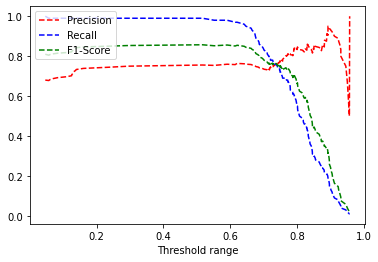

In [24]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg.predict_proba(X_test)[:,1]
# display(y_scores)

prec, rec, tre = precision_recall_curve(y_test,y_scores)

plt.plot(tre,prec[:-1],'r--',label='Precision')
plt.plot(tre,rec[:-1],'b--',label='Recall')

f_score = (2*prec*rec)/(prec+rec)

plt.plot(tre,f_score[:-1],'g--',label='F1-Score')

plt.xlabel('Threshold range')
plt.legend(loc='upper left')

In [29]:
index = np.where(f_score==max(f_score))
print("Optimum Threshold for max precision and recall is {}".format(tre[index]))

Optimum Threshold for max precision and recall is [0.51686102]


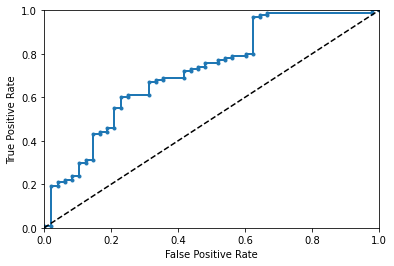

In [31]:
from sklearn.metrics import roc_curve

y_scores = logreg.predict_proba(X_test)

fpr, tpr, threshold= roc_curve(y_test, y_scores[:,1])

def plot_roc_curve(fpr, tpr):

    plt.clf()
    plt.plot(fpr, tpr, linewidth=2, marker='.', label='Logistic')
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()